In [1]:
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
geo = 'rRNAModifications'
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_unzip = os.path.join(pth_data, 'unzip', geo)
pth_out = os.path.join(pth_data, 'processed')
pth_fig = os.path.join(pth, 'figures', 'preprocessing')

In [ ]:
df_summary = pd.read_csv(os.path.join(pth_data, 'summary.csv'), index_col = 0)
df_summary = df_summary.loc[geo].copy(); df_summary

,Source,Name,Study,Species,Trajectory,Age,Description
5,rRNAModifications,Cranial Neural Crest,Poverennaya et al.,mmusculus,True,E8.5-10.5,Neural crest cell dataset showing the bifurcat...


In [3]:
fn = glob.glob(os.path.join(pth_unzip, 'mcran*.h5ad'))[0]
adata = sc.read_h5ad(fn); adata

AnnData object with n_obs × n_vars = 3421 × 17810
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'sample', 'RNA_snn_res.0.5', 'ident', 'celltype', 'velocity_self_transition'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_genes'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'logcounts', 'scaled'
    obsp: 'connectivities', 'distances'

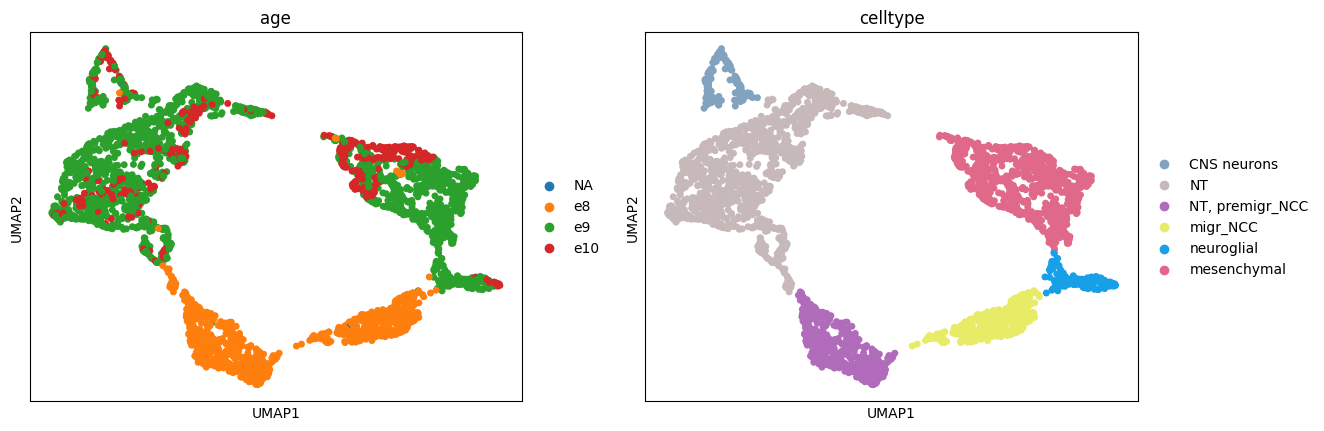

In [8]:
sc.pl.umap(adata, color = ['age', 'celltype'], size = 100)

In [9]:
celltype_dict = {
    'CNS neurons'     : 'CNS Neurons',
    'NT'              : 'Neural Tube',
    'NT, premigr_NCC' : 'Premigratory Neural Crest',
    'migr_NCC'        : 'Migratory Neural Crest',
    'neuroglial'      : 'Neuroglial Progenitors',
    'mesenchymal'     : 'Cranial Mesenchyme'}

adata.obs['celltype_original'] = adata.obs.celltype.copy()
adata.obs['celltype'] = adata.obs.celltype.map(celltype_dict).astype('category')

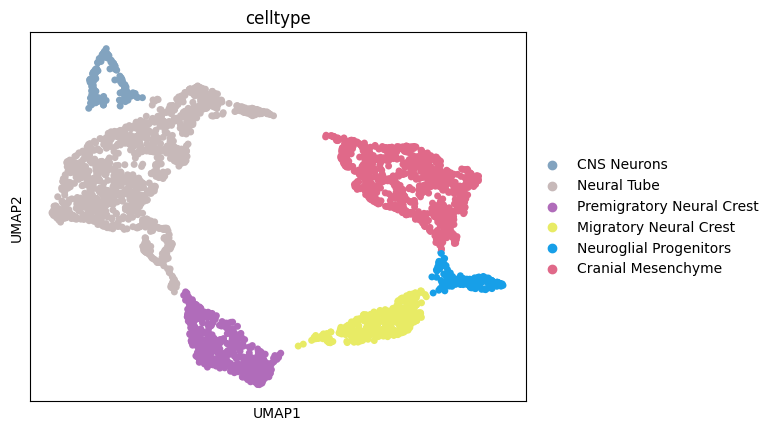

In [10]:
sc.pl.umap(adata, color = 'celltype', size = 100)

In [11]:
adata.write(os.path.join(pth_out, f'{geo}.h5ad'))

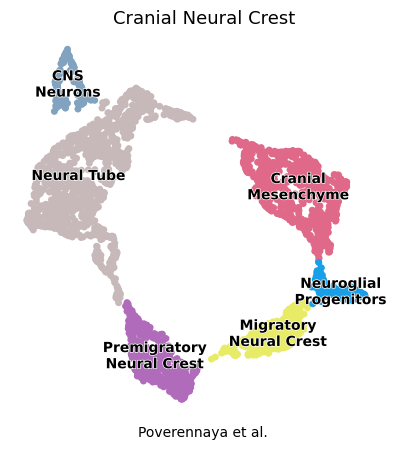

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata, color = 'celltype', size = 100,
           legend_loc = 'on data', legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ax.set_xlim(right = ax.get_xlim()[1] + 1)

label_dict = {
    'CNS Neurons'               : 'CNS\nNeurons',
    'Premigratory Neural Crest' : 'Premigratory\nNeural Crest',
    'Migratory Neural Crest'    : 'Migratory\nNeural Crest',
    'Neuroglial Progenitors'    : 'Neuroglial\nProgenitors',
    'Cranial Mesenchyme'        : 'Cranial\nMesenchyme'}

pos_dict = {
    'CNS Neurons'               : (.15, 0),
    'Neural Tube'               : (-1, 0),
    'Premigratory Neural Crest' : (.15, .5)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df_summary.Name, size = 13)
ax.text(.33, -.05, df_summary.Study, transform = ax.transAxes)
fn = os.path.join(pth_fig, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')